In [70]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)

In [72]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Text(0.5, 1.0, 'Profit in $10000s vs City Population in 10000s')

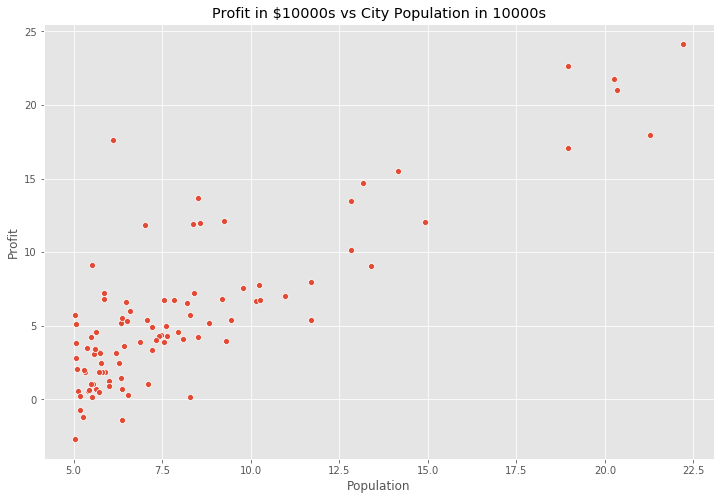

In [74]:
ax = sns.scatterplot(x = 'Population', y = 'Profit', data = data)
ax.set_title('Profit in $10000s vs City Population in 10000s')

In [75]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    return 1 / (2 * m) * np.sum(error)

In [76]:
m = data.Population.values.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2, 1))
cost_function(X, y, theta)

32.072733877455676

In [77]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
    return theta, costs   
    

In [78]:
theta, costs = gradient_descent(X, y ,theta, alpha=0.01, iterations = 2000)
print("h(X) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                               str(round(theta[1, 0], 2))))

h(X) = -3.79 + 1.18x1


In [79]:
from mpl_toolkits.mplot3d import Axes3D

In [80]:
theta_0 = np.linspace(-10 , 10, 100)
theta_1 = np.linspace(-1, 4, 100)
cost_values = np.zeros((len(theta_0),len(theta_1)))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

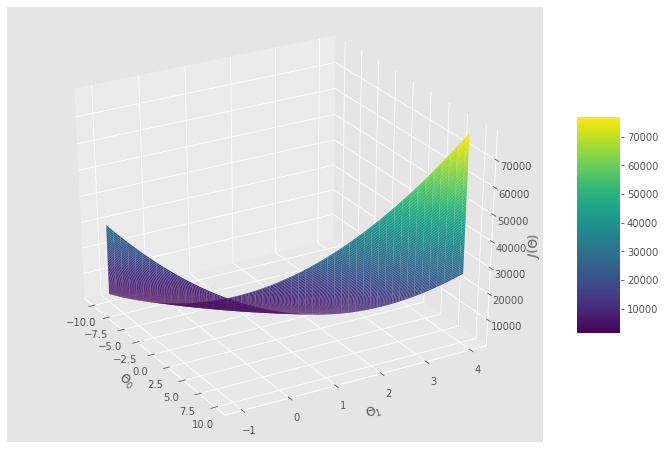

In [81]:
fig = plt.figure(figsize = (12 ,8))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 330)
plt.show()


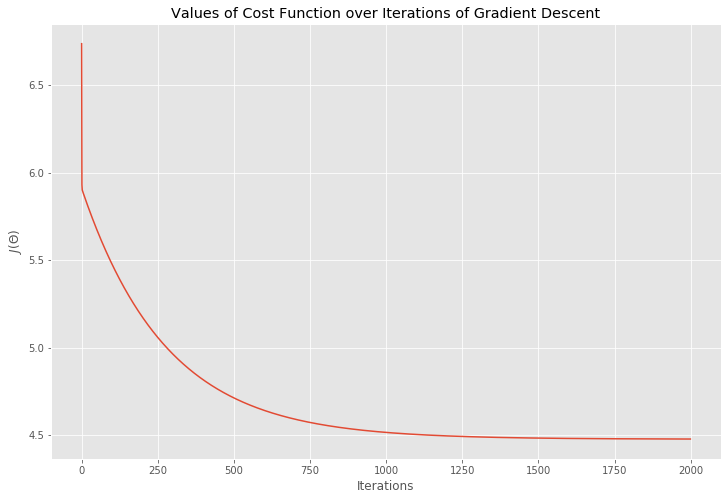

In [82]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over Iterations of Gradient Descent");

In [83]:
 theta.shape

(2, 1)

In [84]:
theta

array([[-3.78806857],
       [ 1.18221277]])

Text(0.5, 1.0, 'Linear regression fit')

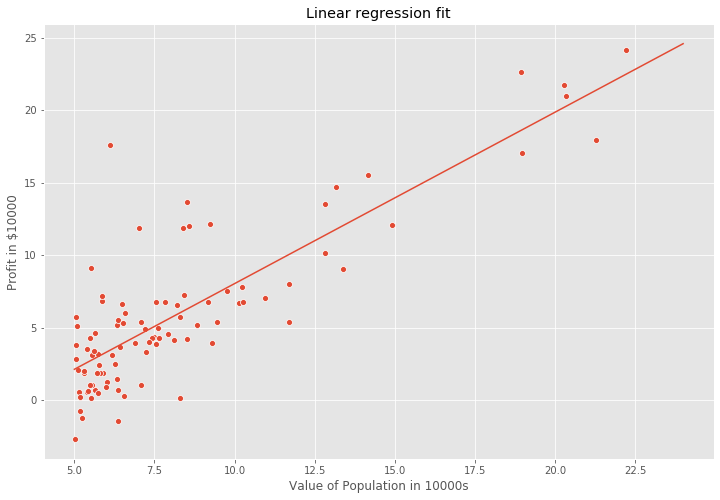

In [85]:
theta = np.squeeze(theta)
sns.scatterplot(x = 'Population', y = 'Profit', data = data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel("Value of Population in 10000s")
plt.ylabel("Profit in $10000")
plt.title("Linear regression fit")

In [86]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [87]:
y_pred_1 = predict(np.array([1, 4]), theta) * 10000
print("For a population of 40000 people, the model predicts the profit of $" + str(round(y_pred_1, 0)))

For a population of 40000 people, the model predicts the profit of $9408.0


In [88]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a population of 83000 people, the model predicts the profit of $" + str(round(y_pred_2, 0)))

For a population of 83000 people, the model predicts the profit of $60243.0
